In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from boundary import *
from tools import *
from oper import *


In [3]:
nx = 401
nz = 401
nt = 2001
npml = 20

dx = 10.
dz = 10.
dt = 1e-3

fmax = 15

nshot = 1
fshot_x = 150
dshot_x = 0
fshot_z = 2
dshot_z = 0

nrcv = 1
frcv_x = 250
drcv_x = 1
frcv_z = 2
drcv_z = 0

geom_ID = 1

no = 2
rtype = np.float64

In [4]:
nx_e = nx + 2*npml
nz_e = nz + 2*npml
a_x,a_xh,a_z,a_zh,b_x,b_xh,b_z,b_zh=gen_cpml(npml,fmax,dx,dt,nx_e,nz_e,rtype)

## 1. make velocity

In [5]:
vp = np.ones((nz,nx),rtype) * 3000.
vp_p = vp.copy()
vp_p[200,200] = 3010.

In [6]:
vp_p_e = vel_exp(nx,nz,no,npml,rtype,vp_p)
vp_e = vel_exp(nx,nz,no,npml,rtype,vp)

In [7]:
vp_p_e=vp_p_e[no:no+nz_e,no:no+nx_e]
vp_e =vp_e[no:no+nz_e,no:no+nx_e]

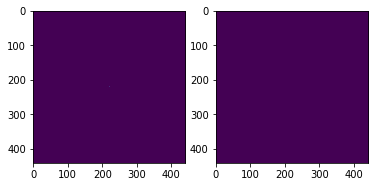

In [8]:
fig,ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(vp_p_e)
ax[1].imshow(vp_e)

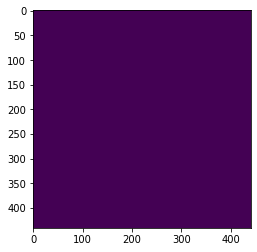

In [10]:
plt.imshow(vp_e)
plt.savefig('per_velocity.png')

## 2. make source wavelet

In [14]:
source = ricker(nt,dt,fmax,rtype)

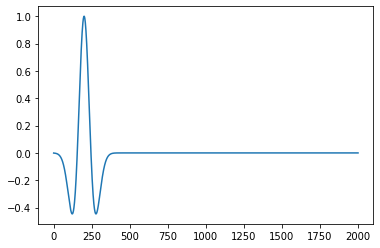

In [15]:
plt.plot(source)

In [16]:
no

2

## 3. set geometry

In [17]:
sx,sz = ass_shot(nshot,fshot_x,dshot_x,fshot_z,dshot_z,npml,no)

ishot=0
rx,rz = ass_rcv(ishot,nrcv,frcv_x,drcv_x,frcv_z,drcv_z,npml,no,geom_ID)

In [18]:
C=np.array([1.12500000000000, -0.0416666666666667])

## 5. true perturbed 

In [19]:
seis,wave=forward(ishot,vp_p_e,nx,nz,nt,npml,no,dx,dz,dt,source,
            sx,sz,rx,rz,
            nrcv,
            C,
           a_x,a_xh,a_z,a_zh,
           b_x,b_xh,b_z,b_zh,rtype)

In [20]:
seis_h,wave=forward(ishot,vp_e,nx,nz,nt,npml,no,dx,dz,dt,source,
            sx,sz,rx,rz,
            nrcv,
            C,
           a_x,a_xh,a_z,a_zh,
           b_x,b_xh,b_z,b_zh,rtype)

In [21]:
data_pertur = seis- seis_h

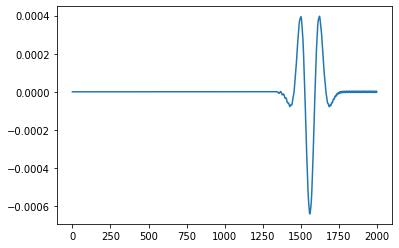

In [22]:
plt.plot(data_pertur)

In [23]:
seisdd,wave2=forward_fwi(ishot,vp_e,nx,nz,nt,npml,no,dx,dz,dt,source,
            sx,sz,rx,rz,
            nrcv,
            C,
           a_x,a_xh,a_z,a_zh,
           b_x,b_xh,b_z,b_zh,rtype)

In [24]:
wave2 = wave2[:,npml:npml+nz,npml:npml+nx]

In [25]:

nshot = 1
fshot_x_p = 200
dshot_x_p = 0
fshot_z_p = 200
dshot_z_p = 0


In [26]:
sx_p,sz_p = ass_shot(nshot,fshot_x_p,dshot_x_p,fshot_z_p,dshot_z_p,npml,no)


In [27]:
wave2.shape

(2001, 401, 401)

In [28]:
source_vir = wave2[:,fshot_z_p,fshot_x_p]

In [29]:
seis_vir,wave=forward(ishot,vp_e,nx,nz,nt,npml,no,dx,dz,dt,source_vir,
            sx_p,sz_p,rx,rz,
            nrcv,
            C,
           a_x,a_xh,a_z,a_zh,
           b_x,b_xh,b_z,b_zh,rtype)

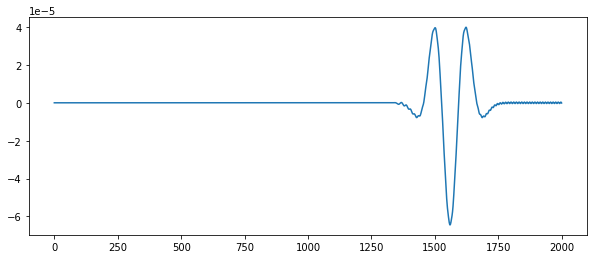

In [30]:
plt.figure(figsize=(10,4))
plt.plot(seis_vir)


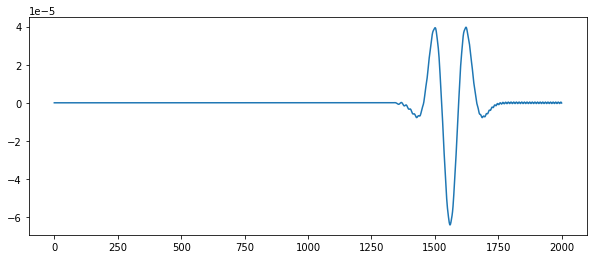

In [31]:
plt.figure(figsize=(10,4))
plt.plot(data_pertur/10)


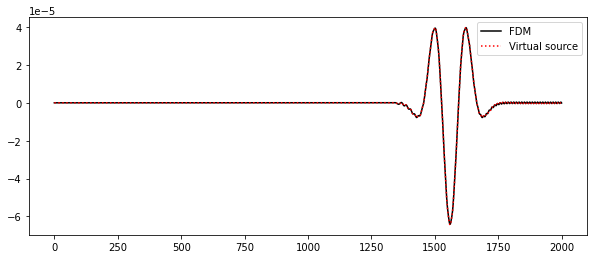

In [43]:
plt.figure(figsize=(10,4))
plt.plot(data_pertur/10, label="FDM",color="black") 
plt.plot(seis_vir, label="Virtual source",linestyle=":",color="red") 
plt.legend()
plt.savefig('vir_TEST')